In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, neighbors
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Problem 2

In [82]:
#read data into a dataframe
zip_train = pd.read_csv('zip_train.txt', header=None, delimiter = ' ')

#ad hoc changes
zip_train.drop([257], axis = 1, inplace = True)
zip_train.rename({0 : 'digit'}, axis = 1, inplace = True)

#we only care about the digits 2 and 3
zip_train = zip_train[(zip_train['digit'] == 2.0) | (zip_train['digit'] == 3.0)]

In [83]:
#import the test data
zip_test = pd.read_csv('zip_test.txt', header = None, delimiter = ' ')
#rename the digit column
zip_test.rename({0 : 'digit'}, axis = 1, inplace = True)
#filter out everything but 2 and 3
zip_test = zip_test[(zip_test['digit'] == 2.0) | (zip_test['digit'] == 3.0)]

In [88]:
#create a training x and y
train_x = zip_train.drop('digit', axis = 1)
train_y = zip_train['digit'].astype(int)

#create a testing x and y
test_x = zip_test.drop('digit', axis = 1)
test_y = zip_test['digit'].astype(int)

Linear Regression

In [89]:
#create a linear regression object
regr = linear_model.LogisticRegression()

In [90]:
#train the model
regr.fit(train_x, train_y)

/Users/AngelaBeckham/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
#calculate the train and test error for the linear model
lm_train_error = 1 - regr.score(train_x, train_y)
lm_test_error = 1 - regr.score(test_x, test_y)

K - Nearest Neighbors

In [94]:
k_vals = [1, 3, 5, 7, 15]
#create a dictionary to hold error data
k_error = {'k_vals' : k_vals,
          'train_error': [],
          'test_error': []}

In [95]:
for k in k_vals:
    klass =  neighbors.KNeighborsClassifier(n_neighbors= k)
    klass.fit(train_x, train_y)
    #calculate training data error and append it to dictionary
    k_error['train_error'].append(1 - klass.score(train_x, train_y))
    #calculate test data error and append it to dictionary
    k_error['test_error'].append(1 - klass.score(test_x, test_y))

In [109]:
#convert the error dictionary into a dataframe so that it is easier to graph
error_data = pd.DataFrame(k_error)
error_data.rename({'k_vals' : 'k'}, axis = 1, inplace = True)
error_data.set_index('k', inplace = True)

Model Comparison

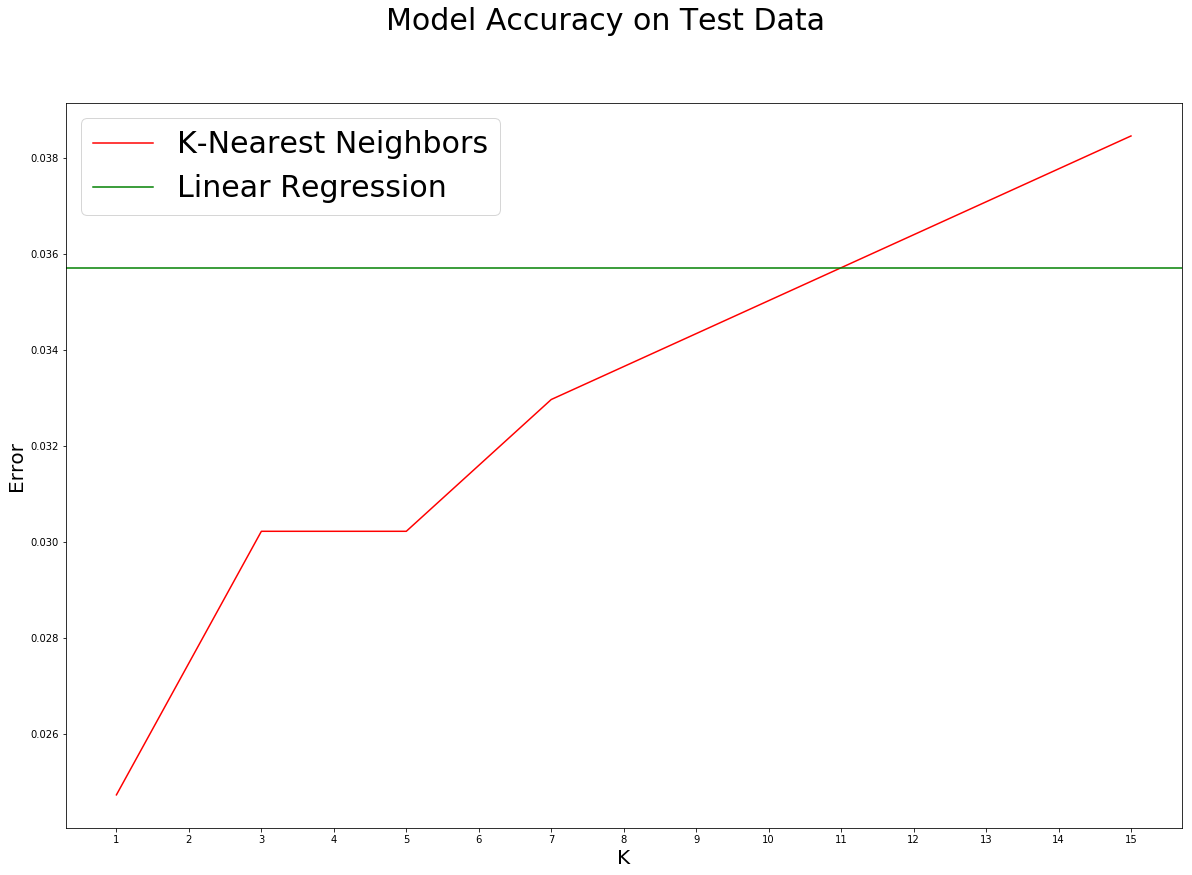

In [108]:
test_fig = plt.figure(num = 1, figsize = [20, 13.333])
test_fig.suptitle('Model Accuracy on Test Data', fontsize = 30)
k_err, = plt.plot(error_data.index, error_data['test_error'], label = 'K-Nearest Neighbors', color = 'red')
lin_err = plt.axhline(lm_test_error, label = 'Linear Model', color = 'green')
plt.legend([k_err, lin_err], ['K-Nearest Neighbors', 'Linear Regression'], prop={'size': 30})
plt.xlabel('K', fontsize = 20)
plt.ylabel('Error', fontsize = 20)
plt.xticks(np.arange(1.0, 16, 1))
plt.show()

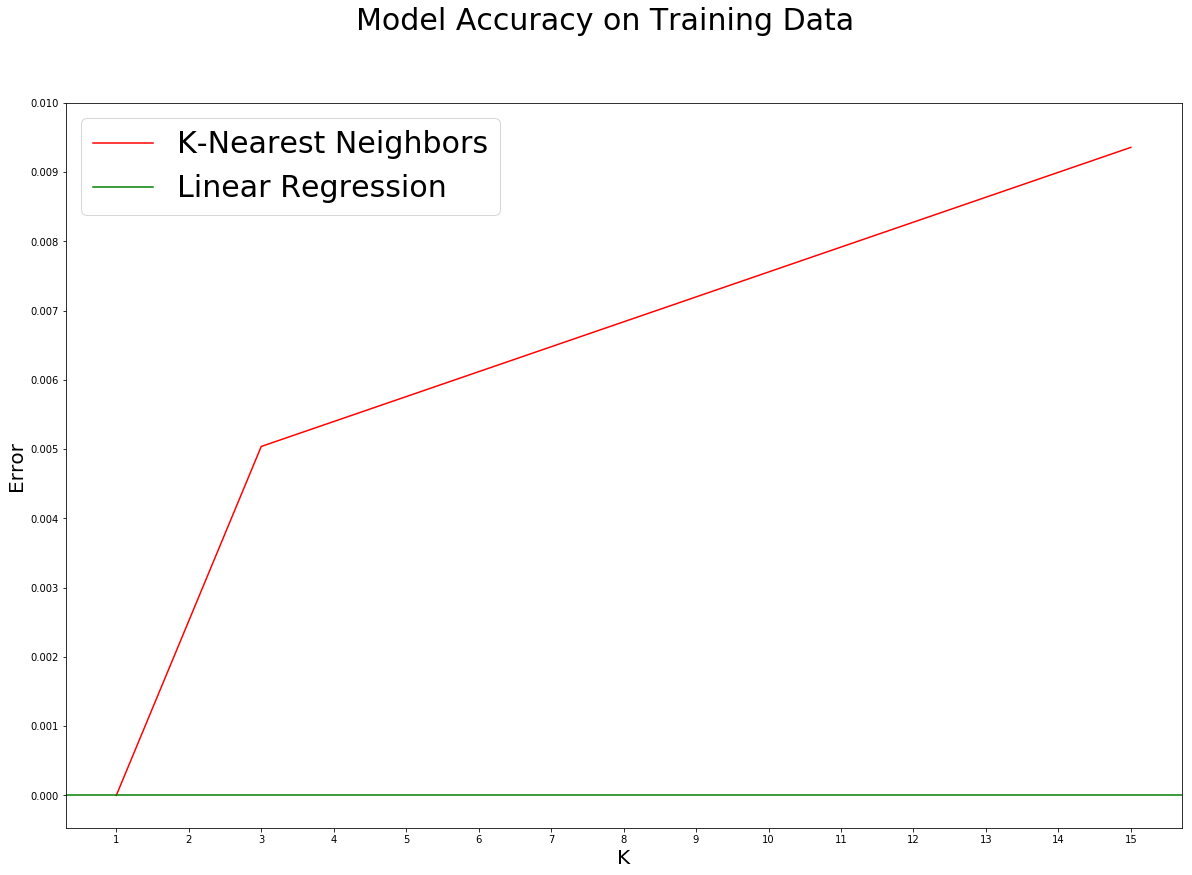

In [106]:
train_fig = plt.figure(num = 2, figsize = [20, 13.333])
train_fig.suptitle('Model Accuracy on Training Data', fontsize = 30)
k_err, = plt.plot(error_data.index, error_data['train_error'], label = 'K-Nearest Neighbors', color = 'red')
lin_err = plt.axhline(lm_train_error, label = 'Linear Model', color = 'green')
plt.legend([k_err, lin_err], ['K-Nearest Neighbors', 'Linear Regression'], prop={'size': 30})
plt.xlabel('K', fontsize = 20)
plt.ylabel('Error', fontsize = 20)
plt.xticks(np.arange(1.0, 16, 1))
plt.yticks(np.arange(0.0, .011, .001))
plt.show()

# Question 6

In [4]:
def f1(x):
    return x[0] + x[1] + x[2]
def f2(x):
    return .5*(pow(x[0] + x[1] + x[2] + 1, 3))

In [19]:
#I do not understand how this function works
#to debug the rest of the program, I substituted a RNG
def epe(rep, preds, vals):
    return np.random.uniform(low = 0, high = 1)
#     total = 0
#     for r in range(0, rep):
#         total += pow(preds[r] - vals[r], 2)
#     return total/(rep + 1)

In [33]:
N = 500
k = [1, 2]
p_vals = range(3, 11)
y1_sol = 1
y2_sol = 4

Y1 Model Comparison

In [34]:
#create a dictionary to hold error data
y1_dict = {'p' : p_vals, 'lin' : []}
for num in k:
    y1_dict[num] = []

        
for p in p_vals:
#for p in range(3, 11):
    x_matrix = np.random.uniform(low = 0, high = 1, size = (N, p))
    y1 = np.fromiter((f1(x) + (np.random.normal(0, 1)) for x in x_matrix), dtype = float)
    #y1 = y1 + np.random.normal(0, 1, size = y1.size)
    
    #create the test data array
    test_x = [1]
    while len(test_x) < p:
        test_x.append(0)
    test_x = np.array([test_x])
    
    #create a linear regression object
    regr1 = linear_model.LinearRegression()
    #train the model
    regr1.fit(x_matrix, y1)
    #make a prediction based on test data
    y1_pred = regr1.predict(test_x)
    #calculate error and append it to data dictionary
    y1_dict['lin'].append(epe(0, y1_pred, y1_sol))

    for num in k:
        #create a k-nearest-neighbors object
        klass1 =  neighbors.KNeighborsRegressor(n_neighbors= num)
        #fir the model
        klass1.fit(x_matrix, y1)
        k_pred = klass1.predict(test_x)
        y1_dict[num].append(epe(0, k_pred, y1_sol))

In [40]:
#convert the dictionary into a dataframe so that it can be more easily graphed
error_data = pd.DataFrame(y1_dict)
error_data.set_index('p', inplace = True)

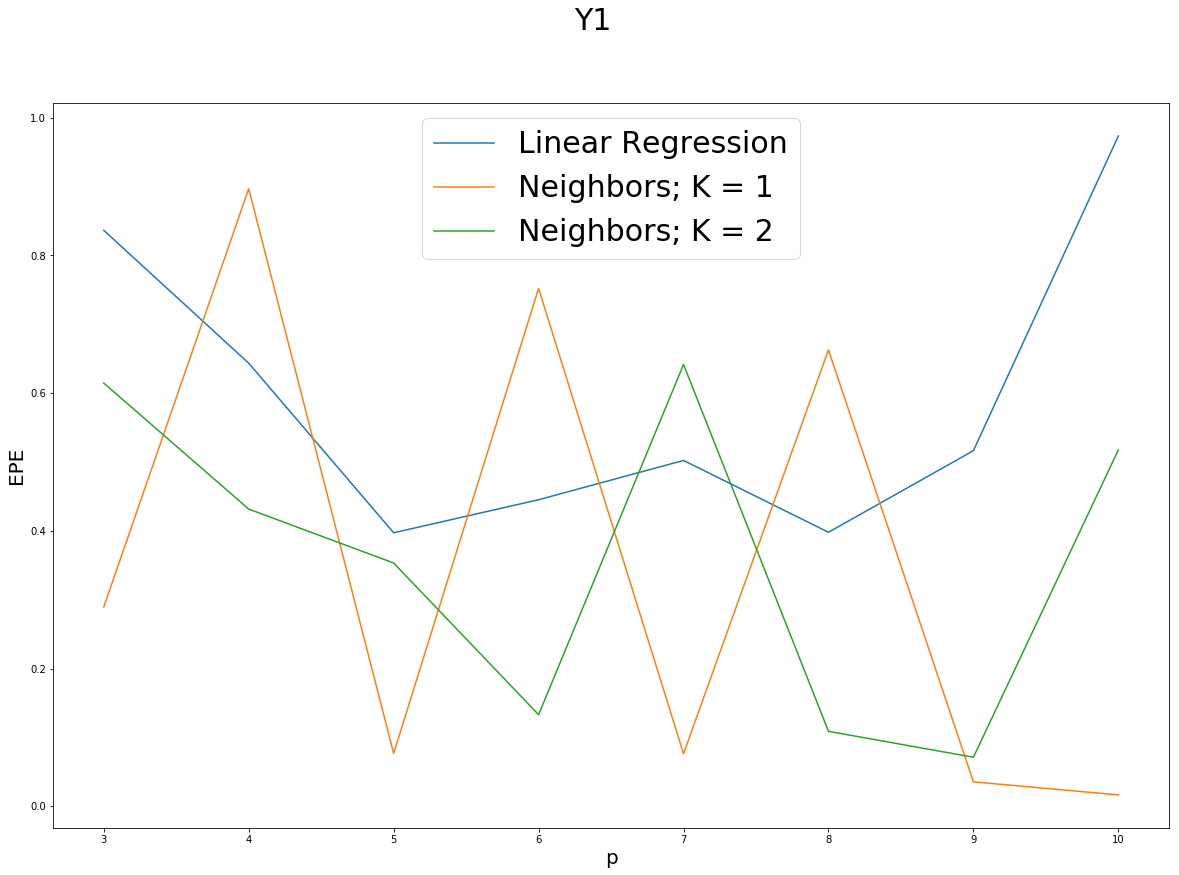

In [52]:
fig1 = plt.figure(num = 1, figsize = [20, 13.333])
fig1.suptitle('Y1', fontsize = 30)
lin, = plt.plot(error_data.index, error_data['lin'], label = 'Linear Regression')
k1, = plt.plot(error_data.index, error_data[1], label = 'Neighbors; K = 1')
k2, = plt.plot(error_data.index, error_data[2], label = 'Neighbors; K = 2')
plt.xlabel('p', fontsize = 20)
plt.ylabel('EPE', fontsize = 20)
plt.legend([lin, k1, k2], ['Linear Regression', 'Neighbors; K = 1', 'Neighbors; K = 2'], prop={'size': 30})
plt.show()

Y2 Model Comparison

In [47]:
#create a dictionary to hold error data
y2_dict = {'p' : p_vals, 'lin' : []}
for num in k:
    y2_dict[num] = []

        
for p in p_vals:
#for p in range(3, 11):
    x_matrix = np.random.uniform(low = 0, high = 1, size = (N, p))
    y2 = np.fromiter((f2(x) + (np.random.normal(0, 1)) for x in x_matrix), dtype = float)
    #y2 = y2 + np.random.normal(0, 1, size = y2.size)
    
    #create the test data array
    test_x = [1]
    while len(test_x) < p:
        test_x.append(0)
    test_x = np.array([test_x])
    
    #create a linear regression object
    regr2 = linear_model.LinearRegression()
    #train the model
    regr2.fit(x_matrix, y2)
    #make a prediction based on test data
    y2_pred = regr2.predict(test_x)
    #calculate error and append it to data dictionary
    y2_dict['lin'].append(epe(0, y1_pred, y1_sol))

    for num in k:
        #create a k-nearest-neighbors object
        klass2 =  neighbors.KNeighborsRegressor(n_neighbors= num)
        #fir the model
        klass2.fit(x_matrix, y2)
        k_pred = klass2.predict(test_x)
        y2_dict[num].append(epe(0, k_pred, y2_sol))

In [49]:
#convert the dictionary into a dataframe so that it can be more easily graphed
error_data2 = pd.DataFrame(y2_dict)
error_data2.set_index('p', inplace = True)

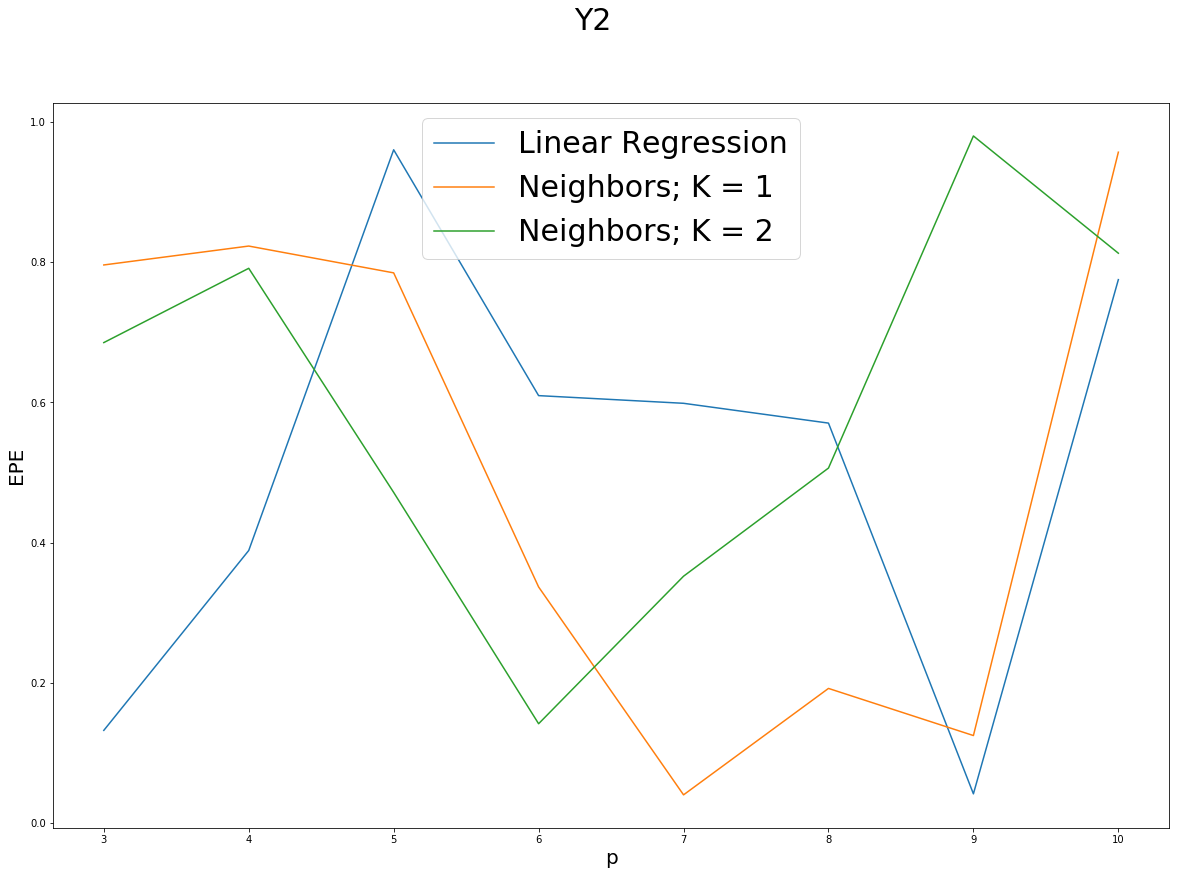

In [53]:
fig2 = plt.figure(num = 1, figsize = [20, 13.333])
fig2.suptitle('Y2', fontsize = 30)
lin, = plt.plot(error_data2.index, error_data2['lin'], label = 'Linear Regression')
k1, = plt.plot(error_data2.index, error_data2[1], label = 'Neighbors; K = 1')
k2, = plt.plot(error_data2.index, error_data2[2], label = 'Neighbors; K = 2')
plt.xlabel('p', fontsize = 20)
plt.ylabel('EPE', fontsize = 20)
plt.legend([lin, k1, k2], ['Linear Regression', 'Neighbors; K = 1', 'Neighbors; K = 2'], prop={'size': 30})
plt.show()

# Question 7

In [110]:
def f(x, c):
    return np.exp(-c*pow(np.linalg.norm(x), 2))

In [112]:
#define constants
c = 4
p_vals = [1, 3, 5, 7, 10, 15]
k = 1

In [128]:
#create a dictionary that holds error data
error_dict = {'p' : p_vals,
              'mspe' : [],
              'bias' : [],
              'variance' : [],
             'distance' : []}

In [129]:
for p in p_vals:
    train_x = np.random.uniform(low = 0, high = 1, size = (50, p))
    train_y = np.fromiter((f(x, c) for x in train_x), dtype = float)
    
    test_x  = np.random.uniform(low = 0, high = 1, size = (10, p))
    test_y = np.fromiter((f(x, c) for x in test_x), dtype = float)
    
    klass = neighbors.KNeighborsRegressor(n_neighbors= 1)
    klass.fit(train_x, train_y)
    preds = klass.predict(test_x)
    error_dict['mspe'].append(mean_squared_error(test_y, preds))

In [126]:
# error_data = pd.DataFrame(error_dict)
# error_data.set_index('p', inplace = True)

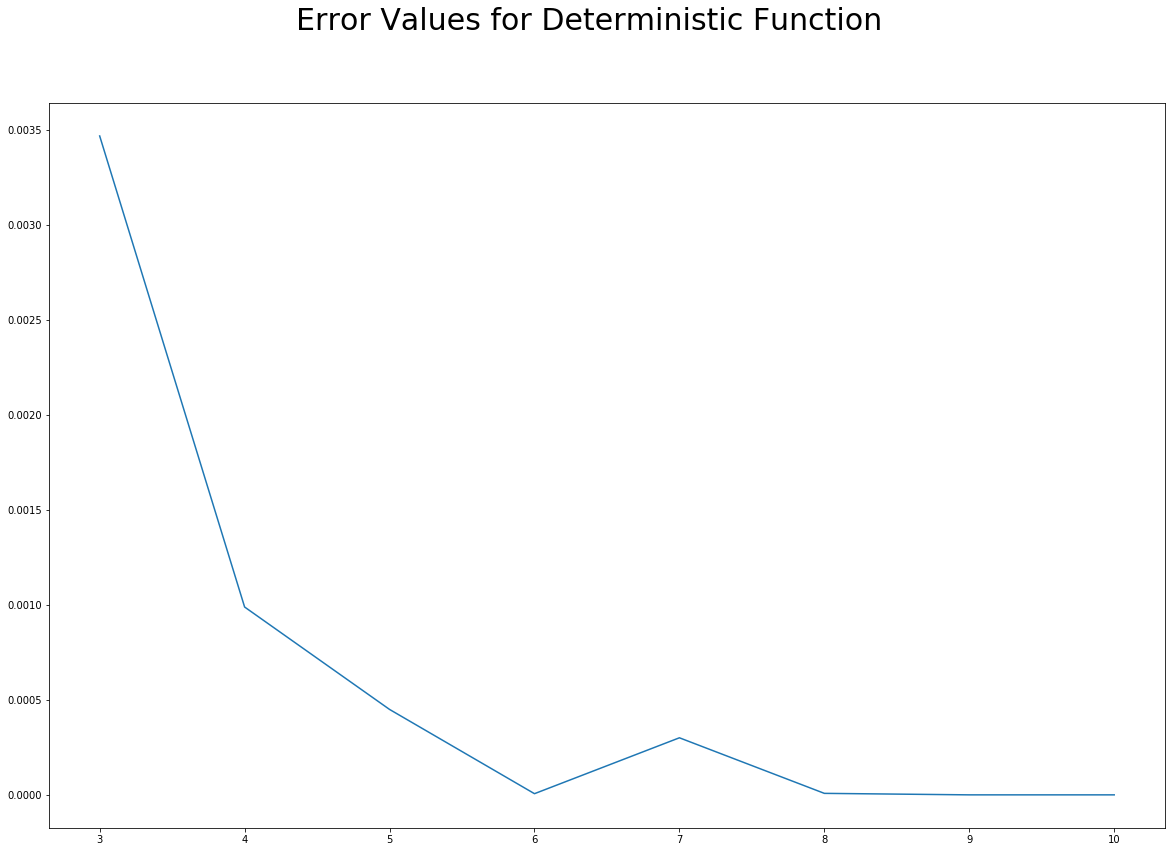

In [130]:
fig7 = plt.figure(num = 7, figsize = [20, 13.333])
fig7.suptitle('Error Values for Deterministic Function', fontsize = 30)
mspe, = plt.plot(error_dict['p'], error_dict['mspe'], label = 'Mean Squared Prediction Error')
bias, = 
plt.show()

# lin, = plt.plot(error_data2.index, error_data2['lin'], label = 'Linear Regression')
# k1, = plt.plot(error_data2.index, error_data2[1], label = 'Neighbors; K = 1')
# k2, = plt.plot(error_data2.index, error_data2[2], label = 'Neighbors; K = 2')
# plt.xlabel('p', fontsize = 20)
# plt.ylabel('EPE', fontsize = 20)
# plt.legend([lin, k1, k2], ['Linear Regression', 'Neighbors; K = 1', 'Neighbors; K = 2'], prop={'size': 30})
# plt.show()